<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/Fake-news-classification/fake_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset link
<a href="https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv"><img src="https://www.freepnglogos.com/uploads/indian-flag-png/indian-flag-india-day-background-png-image-download-5.png" width="200"></a>

In [2]:
## Extracting the zip file
import zipfile
zf = zipfile.ZipFile("fake_news_data.zip")
zf.extractall()
zf.close()

In [1]:
## importing some basic libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
## Reading the fake and real news

fake = pd.read_csv("Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = pd.read_csv("True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.shape, true.shape

((23481, 4), (21417, 4))

In [7]:
## Assigning the label for fake and true
fake['label'] = 'fake'
true['label'] = 'true'

In [8]:
fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake


In [9]:
true.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true


In [10]:
## We are classifying the new based on headlines
## So selecting only headlines and label for title

req_fake = fake[['title', 'label']]
req_true = true[['title', 'label']]

df = pd.concat([req_fake, req_true], axis = 0)
print(df.shape)
df.head()

(44898, 2)


,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,fake
4,Pope Francis Just Called Out Donald Trump Dur...,fake


In [13]:
df.tail(2)

,title,label
21415,Vatican upbeat on possibility of Pope Francis ...,true
21416,Indonesia to buy $1.14 billion worth of Russia...,true


In [11]:
df['label'].value_counts()

fake    23481
true    21417
Name: label, dtype: int64

### Text preprocessing

In [14]:
## Lowering the all sentences
df['title'] = df['title'].apply(lambda x: x.lower())

In [15]:
df['title'].iloc[0]

' donald trump sends out embarrassing new year’s eve message; this is disturbing'

In [17]:
## Now removing the stopwords
## Downloading the stopwords using nltk library
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
st_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df['title'] = df['title'].apply(lambda x : ' '.join([word for word in x.split() if word not in st_words]))

In [19]:
df['title'].iloc[0]

'donald trump sends embarrassing new year’s eve message; disturbing'

In [30]:
## Now removing the all punctuation and digits
df['title'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

In [33]:
## Now removing the single characters like s, u, a, 

import string

chars = set(string.ascii_lowercase)

df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in chars]))

### NA and duplicate values

In [35]:
## Checking the na value and duplicated values
df.duplicated().any(), df.isna().any()

(True, title    False
 label    False
 dtype: bool)

In [38]:
## Here is some duplicated values
df[df.duplicated()].count()

title    6227
label    6227
dtype: int64

In [39]:
## There is a lot of value duplicated
df.drop_duplicates(keep = 'first', inplace = True)

In [40]:
df.duplicated().any()

False

In [41]:
df.shape

(38671, 2)

### Train test split

In [99]:
df['label'].value_counts()

1    20773
0    17898
Name: label, dtype: int64

In [100]:
## Randomizing the dataframe
df = df.sample(df.shape[0])

In [68]:
## mapping fake as 0 and true as 1
df['label'] = df['label'].map({'true':1, 'fake':0})

In [101]:
from sklearn.model_selection import train_test_split

X = df['title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32870,), (5801,), (32870,), (5801,))

### Word tokenizing and padding

In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tk = Tokenizer(oov_token='<OOV_TOKEN>')
tk.fit_on_texts(X_train)

In [104]:
num_words = len(tk.word_index) ## Total no of unique words

In [105]:
train_sequence = tk.texts_to_sequences(X_train)

In [106]:
test_sequence = tk.texts_to_sequences(X_test)

In [107]:
## Taking the maximum size of sentence 
max_len = 30
def pad(sentences):
    return pad_sequences(sentences, maxlen = max_len, padding = 'post', truncating='post')

In [108]:
train_pad = pad(train_sequence)
train_pad[:3]

array([[  252,  8054,    65,  6283,   144,    87,  5690,  3898,  7024,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [   39,  1128,  2511,  1129,   102,    33,  6284,   285, 12303,
        12304, 12305,    53,  1128,    34,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [  657,  7025,   176,  4795,   256,  5691,    36,     2,   662,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]], dtype=int32)

In [109]:
test_pad = pad(test_sequence)
test_pad[:3]

array([[   2, 1141, 2437, 3541,    1, 3058,  662,  205,   73,  329, 1667,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   9,  122, 7813, 2554, 1311,    2,   37, 1162,  393,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   7,   62,  471,  415, 1330,   12,    2, 1645,   18,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]], dtype=int32)

### Model building

In [110]:
from tensorflow.keras import layers, models

In [126]:
model = models.Sequential([
    layers.Input(shape=(max_len, )),
    layers.Embedding(num_words, 30, input_length=30),
    layers.LSTM(30, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(90),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 30)            578880    
                                                                 
 lstm_13 (LSTM)              (None, 30, 30)            7320      
                                                                 
 lstm_14 (LSTM)              (None, 30, 64)            24320     
                                                                 
 lstm_15 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_10 (Dropout)        (None, 90)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                5824      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [127]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [128]:
history = model.fit(train_pad, y_train,
          validation_data = (test_pad, y_test),
          epochs = 10,
          batch_size = 128
          )

Epoch 1/10
257/257 [==============================] - 9s 16ms/step - loss: 0.2163 - accuracy: 0.9006 - val_loss: 0.1260 - val_accuracy: 0.9526
Epoch 2/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0796 - accuracy: 0.9714 - val_loss: 0.1283 - val_accuracy: 0.9522
Epoch 3/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0487 - accuracy: 0.9831 - val_loss: 0.1542 - val_accuracy: 0.9459
Epoch 4/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.2099 - val_accuracy: 0.9417
Epoch 5/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.2538 - val_accuracy: 0.9412
Epoch 6/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.2861 - val_accuracy: 0.9388
Epoch 7/10
257/257 [==============================] - 3s 12ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.3582 - val_accuracy: 0.9345

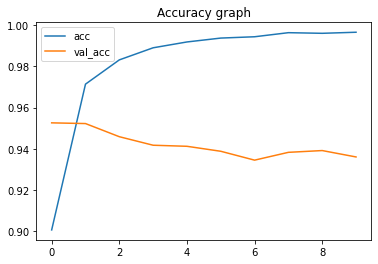

In [129]:
import matplotlib.pyplot as plt
## Plotting the accuracy graphs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.legend(['acc', 'val_acc'])
plt.show()

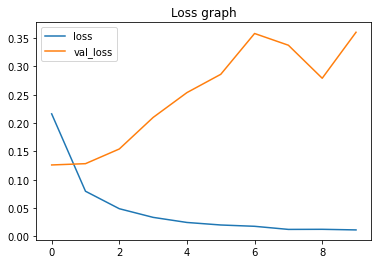

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss graph")
plt.legend(['loss', 'val_loss'])
plt.show()